# Maven Mega Mart




In [1]:
# Importing libraries

import pandas as pd
import numpy as np

In [2]:
# Reading transaction data

path = '../Data/project_transactions.csv'

# Setting the columns that we are going to required for analysis
cols = ['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE']
dtype = {'DAY' : 'Int16', 'QUANTITY' : 'Int32', 'PRODUCT_ID' : 'Int32'}

# Converting `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types

transactions = pd.read_csv(path, usecols=cols, dtype= dtype)

transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
0,1364,26984896261,1,842930,1,2.19
1,1364,26984896261,1,897044,1,2.99
2,1364,26984896261,1,920955,1,3.09
3,1364,26984896261,1,937406,1,2.50
4,1364,26984896261,1,981760,1,0.60


In [3]:
transactions.describe().round()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
count,2146311.0,2.146311e+06,2146311.0,2146311.0,2146311.0,2146311.0
mean,1056.0,3.404897e+10,390.0,2884715.0,101.0,3.0
std,605.0,4.723748e+09,190.0,3831949.0,1152.0,4.0
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.0
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.0


In [4]:
# Checking memory usage

transactions.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     Int32  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(1), Int32(2), float64(1), int64(2)
memory usage: 75.7 MB


In [5]:
# creating a Date Column.

transactions = (
    transactions
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

In [6]:
# Checking the Data

transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


## TIME BASED ANALYSIS


In [7]:
# Importing seaborn library
import seaborn as sns

# Setting style to all charts

sns.set_style('darkgrid')

<Axes: title={'center': 'Sales by Month'}, xlabel='Date', ylabel='Sales'>

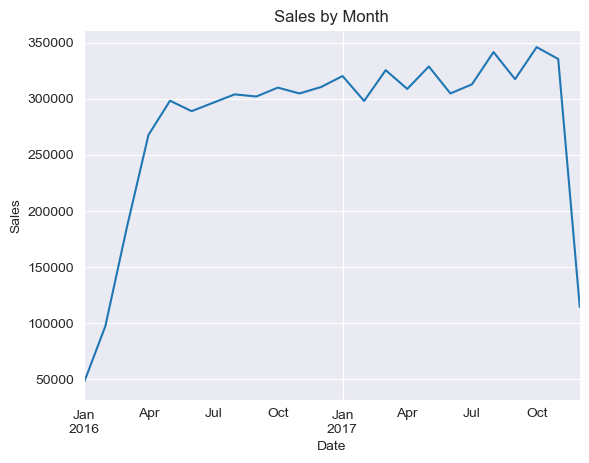

In [8]:
# Plotting the graph showing sum of sales by month

# Set date index, resample on month end, grab sales and plot
transactions.set_index('date').resample('ME').sum().loc[:,'SALES_VALUE'].plot(
    title = 'Sales by Month',
    xlabel = 'Date',
    ylabel = 'Sales'
)

<Axes: title={'center': 'Sales from April 2016 to October 2017'}, xlabel='Date', ylabel='Sales'>

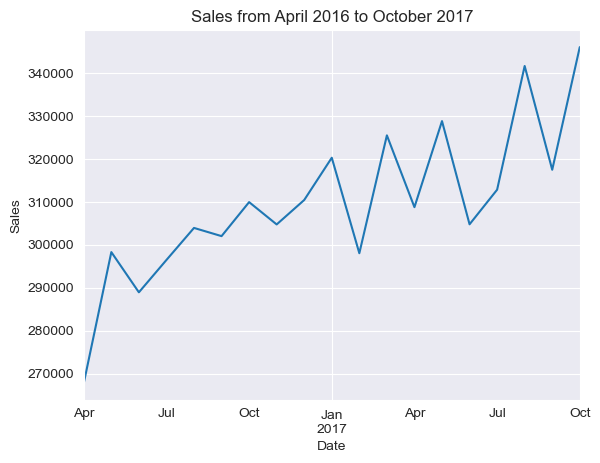

In [9]:
# plotting same series for dates April 2016 and October 2017

transactions.set_index('date').sort_index().loc['2016-04' : '2017-10', 'SALES_VALUE'].resample('ME').sum().plot(
    title = 'Sales from April 2016 to October 2017',
    xlabel = 'Date',
    ylabel = 'Sales'
)

<Axes: title={'center': 'Monthly Sales in year 2016 vs 2017'}, xlabel='Date', ylabel='Sales'>

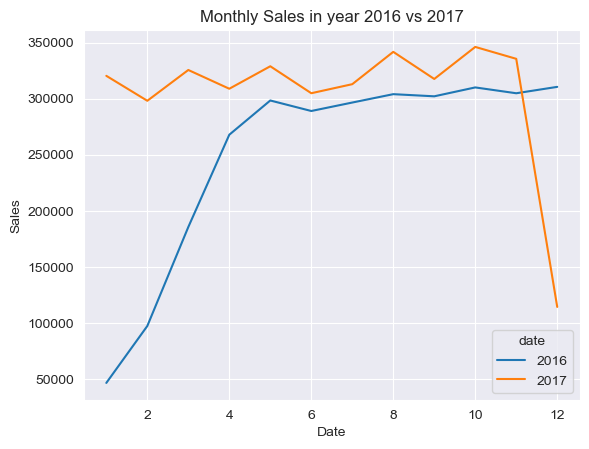

In [10]:
# Plotting the sum of monthly sales in 2016 vs the monthly sales 2017

sales_2016_2017 = transactions.pivot_table(
                        index = transactions['date'].dt.month,
                        columns = transactions['date'].dt.year,
                        values = 'SALES_VALUE',
                        aggfunc = 'sum')

sales_2016_2017.plot(
    title = 'Monthly Sales in year 2016 vs 2017',
    xlabel = 'Date',
    ylabel = 'Sales'
)

<Axes: title={'center': 'Sales by Day of Week'}, xlabel='Day', ylabel='Sales'>

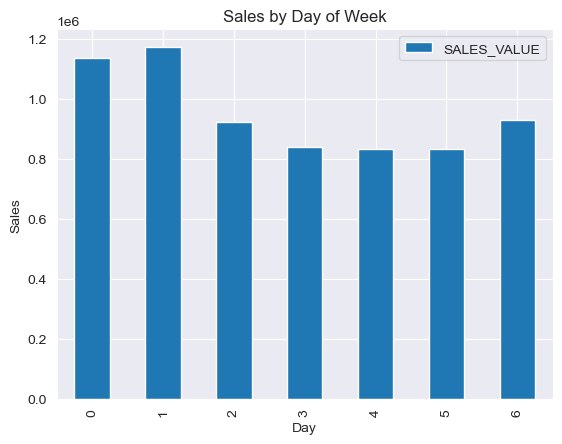

In [11]:
# Plotting total sales by day of week

# Grouping data on day of week by sum of sales
sales_day_of_week = transactions.groupby(transactions['date'].dt.day_of_week).agg({'SALES_VALUE' : 'sum'})

# Plotting the Graph
sales_day_of_week.plot.bar(
    title = 'Sales by Day of Week',
    xlabel = 'Day',
    ylabel = 'Sales'
)

# DEMOGRAPHICS



In [12]:
# Reading demographics data

# Columns we need for analysis
dem_cols = ['AGE_DESC', 'INCOME_DESC', 'household_key', 'HH_COMP_DESC']

# Changing the data types to category
dem_types = {'AGE_DESC' : 'category', 'INCOME_DESC' : 'category', 'HH_COMP_DESC' : 'category'}

# Specifying path
path = '../Data/hh_demographic.csv'

demographics = pd.read_csv(path, usecols=dem_cols, dtype=dem_types)

In [13]:
demographics.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16


In [14]:
# Checking the memory usage
demographics.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   AGE_DESC       801 non-null    category
 1   INCOME_DESC    801 non-null    category
 2   HH_COMP_DESC   801 non-null    category
 3   household_key  801 non-null    int64   
dtypes: category(3), int64(1)
memory usage: 10.7 KB


In [15]:
# Creating total sales by household keys

household_sales = transactions.groupby('household_key').agg({'SALES_VALUE' : 'sum'})

In [16]:
# Joining household_sales and demographics on inner join cause we intrested in both sets

household_sales_demo = household_sales.merge(demographics, how='inner', left_on='household_key', right_on='household_key')

In [17]:
# Checking memory usage

household_sales_demo.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   household_key  668 non-null    int64   
 1   SALES_VALUE    668 non-null    float64 
 2   AGE_DESC       668 non-null    category
 3   INCOME_DESC    668 non-null    category
 4   HH_COMP_DESC   668 non-null    category
dtypes: category(3), float64(1), int64(1)
memory usage: 14.5 KB


<Axes: title={'center': 'Sales by differnt Age groups'}, xlabel='Age Groups', ylabel='sales'>

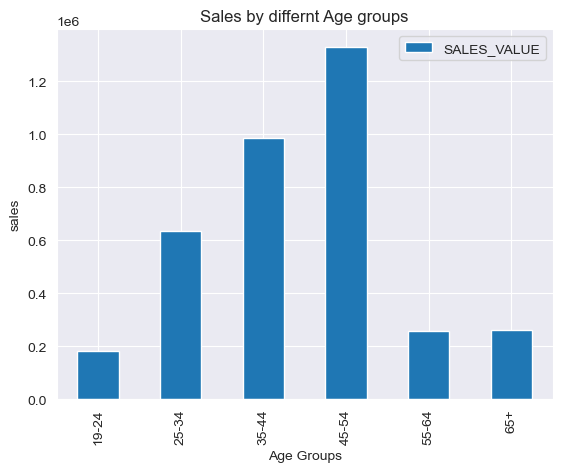

In [18]:
# Plotting sum of sales by age

household_sales_demo.groupby('AGE_DESC', observed=True).agg({'SALES_VALUE' : 'sum'}).plot.bar(
    title = 'Sales by differnt Age groups',
    xlabel = 'Age Groups',
    ylabel = 'sales'
)

<Axes: title={'center': 'Sales by Differnt Income Groups'}, xlabel='Income Groups', ylabel='Sales'>

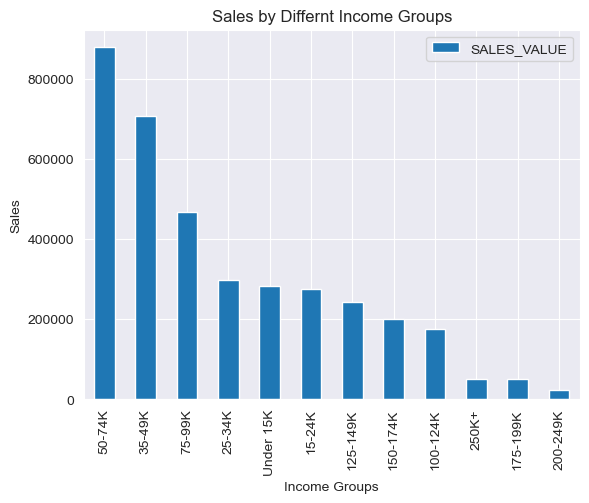

In [19]:
# Plotting sum of sales by income

household_sales_demo.groupby('INCOME_DESC', observed=True).agg(
    {'SALES_VALUE' : 'sum'}).sort_values('SALES_VALUE', ascending=False).plot.bar(
        title = 'Sales by Differnt Income Groups',
        xlabel = 'Income Groups',
        ylabel = 'Sales'
    )

In [20]:
# Pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`

household_sales_demo.pivot_table(
    index = 'AGE_DESC',
    columns = 'HH_COMP_DESC',
    values = 'SALES_VALUE',
    aggfunc = 'mean',
    margins = True,
    observed=True
).style.background_gradient(cmap="RdYlGn", axis=None)

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000,4692.077692
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000,5435.517521
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818,6090.556728
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682,5534.879958
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000,5168.924200
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000,4340.936500
All,6032.802143,6280.069103,5599.857756,4895.928361,4544.646750,4936.127778,5468.398743


In [21]:
# delete dfs we won't use anymore

del [household_sales_demo, household_sales]

# PRODUCT DEMOGRAPHICS





In [22]:
# Reading data from product

# Columns we need for analysis
prod_cols = ['PRODUCT_ID', 'DEPARTMENT']

# Changing data types
prod_dtypes = {'PRODUCT_ID' : 'Int32', 'DEPARTMENT' : 'category'} 

# Path of source file
path = '../Data/product.csv'

product = pd.read_csv(path, usecols=prod_cols, dtype= prod_dtypes)


In [23]:
product.describe().round()

,PRODUCT_ID
count,92353.0
mean,5328353.0
std,5359937.0
min,25671.0
25%,970628.0
50%,1621091.0
75%,9704770.0
max,18316298.0


In [24]:
# Checking memory usage
product.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PRODUCT_ID  92353 non-null  Int32   
 1   DEPARTMENT  92353 non-null  category
dtypes: Int32(1), category(1)
memory usage: 544.8 KB


In [25]:
# Joining all three dataframes on inner join

trans_demo_dept = transactions.merge(demographics, how= 'inner', left_on = 'household_key', right_on = 'household_key').merge(
                        product,how='inner', left_on='PRODUCT_ID', right_on='PRODUCT_ID')

In [26]:
# Checking memory usage of combine dataframe

trans_demo_dept.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161575 entries, 0 to 1161574
Data columns (total 10 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   household_key  1161575 non-null  int64         
 1   BASKET_ID      1161575 non-null  int64         
 2   PRODUCT_ID     1161575 non-null  Int32         
 3   QUANTITY       1161575 non-null  Int32         
 4   SALES_VALUE    1161575 non-null  float64       
 5   date           1161575 non-null  datetime64[ns]
 6   AGE_DESC       1161575 non-null  category      
 7   INCOME_DESC    1161575 non-null  category      
 8   HH_COMP_DESC   1161575 non-null  category      
 9   DEPARTMENT     1161575 non-null  category      
dtypes: Int32(2), category(4), datetime64[ns](1), float64(1), int64(2)
memory usage: 51.0 MB


In [27]:
# Pivoting the fully joined dataframe by AGE_DESC and DEPARTMENT on sum of SALES_VALUE

trans_demo_dept.pivot_table(
    index = 'DEPARTMENT',
    columns = 'AGE_DESC',
    values = 'SALES_VALUE',
    aggfunc = 'sum',
    observed = False  
).style.background_gradient(cmap="RdYlGn", axis=1)

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,0.000000,16.370000
CHARITABLE CONT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000


# EXPORT


In [28]:
# Exporting Pivot table to excel format

trans_demo_dept.pivot_table(
    index = 'DEPARTMENT',
    columns = 'AGE_DESC',
    values = 'SALES_VALUE',
    aggfunc = 'sum',
    observed = False  
).style.background_gradient(cmap="RdYlGn", axis=1).to_excel(
    "../reports/demographic_category_sales.xlsx", sheet_name = "sales_pivot")